<a href="https://www.kaggle.com/code/shiv28/covid-19-forecasting-using-arima?scriptVersionId=96132261" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
covid_word = pd.read_csv('../input/covidowid/owid-covid-data.csv')
covid_word

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187796,ZWE,Africa,Zimbabwe,2022-05-15,249206.0,0.0,122.000,5482.0,0.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
187797,ZWE,Africa,Zimbabwe,2022-05-16,249431.0,225.0,127.857,5484.0,2.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
187798,ZWE,Africa,Zimbabwe,2022-05-17,249748.0,317.0,158.000,5484.0,0.0,0.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
187799,ZWE,Africa,Zimbabwe,2022-05-18,250007.0,259.0,195.000,5486.0,2.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


Let's study our DataSet. As you can see, it consist of 159321 rows × 67 columns. There is some missing data are observed in the DataSet. We should be sure that Python recognized types of data correctly.


In [3]:
covid_word.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187801 entries, 0 to 187800
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    187801 non-null  object 
 1   continent                                   176870 non-null  object 
 2   location                                    187801 non-null  object 
 3   date                                        187801 non-null  object 
 4   total_cases                                 180399 non-null  float64
 5   new_cases                                   180190 non-null  float64
 6   new_cases_smoothed                          179016 non-null  float64
 7   total_deaths                                162023 non-null  float64
 8   new_deaths                                  162021 non-null  float64
 9   new_deaths_smoothed                         160860 non-null  float64
 

As you can see, 66 columns of COVID-19 data were recognized correctly (float64). First 4 columns and tests_units were recognized as objects. Let's investigate them:


In [4]:
fields = ['iso_code', 'continent', 'location', 'tests_units']
covid_word[fields]

,iso_code,continent,location,tests_units
0,AFG,Asia,Afghanistan,NaN
1,AFG,Asia,Afghanistan,NaN
2,AFG,Asia,Afghanistan,NaN
3,AFG,Asia,Afghanistan,NaN
4,AFG,Asia,Afghanistan,NaN
...,...,...,...,...
187796,ZWE,Africa,Zimbabwe,tests performed
187797,ZWE,Africa,Zimbabwe,tests performed
187798,ZWE,Africa,Zimbabwe,tests performed
187799,ZWE,Africa,Zimbabwe,tests performed


Let's show information about the field date.


In [5]:
covid_word['date']

0         2020-02-24
1         2020-02-25
2         2020-02-26
3         2020-02-27
4         2020-02-28
             ...    
187796    2022-05-15
187797    2022-05-16
187798    2022-05-17
187799    2022-05-18
187800    2022-05-19
Name: date, Length: 187801, dtype: object

### Сhange the data types of columns


As you can see, the columns: 'iso_code', 'continent', 'location', 'tests_units' have many repetitions and should be assigned to categorical fields **pandas.astype()**. 

The field 'data' should be converted into DataTime type **pandas.to_datetime**  
To see the results we can use **pandas.describe()**.


In [6]:
fields = ['iso_code', 'continent', 'location', 'tests_units']
covid_word[fields] =covid_word[fields].astype('category')
covid_word.loc[:, 'date'] = pd.to_datetime(covid_word['date'])
covid_word[fields].describe()

,iso_code,continent,location,tests_units
count,187801,176870,187801,101893
unique,244,6,244,4
top,ARG,Africa,Mexico,tests performed
freq,870,43543,870,75951


### Rows filtering


As we can see, the DataSet contains information about 6 continents and 238 countries.
The field 'tests_units' consist of 4 categories. To show a list of countries, we can use **pandas.Series.cat.categories**.


In [7]:
covid_word['location'].cat.categories

Index(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       ...
       'Vanuatu', 'Vatican', 'Venezuela', 'Vietnam', 'Wallis and Futuna',
       'Western Sahara', 'World', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', length=244)

Let's investigate the dynamics of new cases of COVID-19 for a separate country. We will use India for saving models and further forecast. You can use your country. Let's use a pandas filter to do this.


In [8]:
covid_word.index = covid_word['date']
c_covid = covid_word[covid_word['location'] == "India"]
c_covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-01-30,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
2020-01-31,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
2020-02-01,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
2020-02-02,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
2020-02-03,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-15,IND,Asia,India,2022-05-15,43123801.0,2202.0,2628.571,524241.0,27.0,21.143,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
2022-05-16,IND,Asia,India,2022-05-16,43125370.0,1569.0,2525.857,524260.0,19.0,22.429,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
2022-05-17,IND,Asia,India,2022-05-17,43127199.0,1829.0,2373.286,524293.0,33.0,19.429,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN


Let's choose the fields 'new_cases', 'new_cases_smoothed' for forecasting. First of all, we should visualize this data.


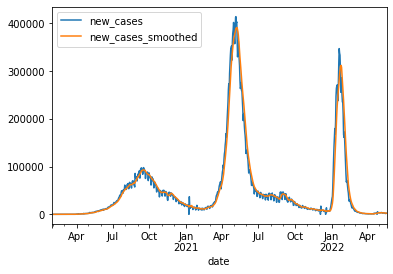

<Figure size 432x288 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt
fields = ['new_cases', 'new_cases_smoothed']
c_covid[fields].plot()
plt.show()
plt.savefig('smooth.png')

### Elimination of missing data


As you can see, there are large fluctuations in the new cases plot. Let's try to make a forecast for these waves.
First of all, we should delete missing data using **pandas.DataFrame.dropna()**


In [10]:
c_covid = c_covid[fields].dropna()
c_covid

,new_cases,new_cases_smoothed
date,,
2020-02-04,0.0,0.429
2020-02-05,0.0,0.429
2020-02-06,0.0,0.286
2020-02-07,0.0,0.286
2020-02-08,0.0,0.286
...,...,...
2022-05-15,2202.0,2628.571
2022-05-16,1569.0,2525.857
2022-05-17,1829.0,2373.286


### Data transformation


 To check for dependencies, it is necessary to perform a correlation analysis between them. This requires:

1.  duplicating of data and moving it vertically down for a certain number of days (lag)
2.  deleting the missing data at the beginning and end **pandas.DataFrame.shift()**
3.  calculating the correlation coefficient between the obtained series.

It is convenient to create a separate function for lag:


In [11]:
def lag_correlation_ts(y, x, lag):
    """
   
    y: fixed
    x: shifted
    lag: lag for shifting
    r: DataFrame of lags correlation coefficients
    """
    r = [0] * (lag + 1)
    y = y.copy()
    x = x.copy()
    y.name = "y"
    x.name = "x"

    for i in range(0, lag + 1):
        ds = y.copy().to_frame()
        ds = ds.join(x.shift(i), how='outer')
        r[i] = ds.corr().values[0][1]
    r = pd.DataFrame(r)
    r.index.names = ['Lag']
    r.columns = ['Correlation']
    return r

Let's create a target DataSet.


In [12]:
y_dataset = c_covid['new_cases']
y_dataset

date
2020-02-04       0.0
2020-02-05       0.0
2020-02-06       0.0
2020-02-07       0.0
2020-02-08       0.0
               ...  
2022-05-15    2202.0
2022-05-16    1569.0
2022-05-17    1829.0
2022-05-18    2364.0
2022-05-19    2259.0
Name: new_cases, Length: 836, dtype: float64

Let's test a 50-day lag.


     Correlation
Lag             
0         1.0000
1         0.9947
2         0.9867
3         0.9783
4         0.9680
5         0.9562
6         0.9440
7         0.9289
8         0.9065
9         0.8820
10        0.8580
11        0.8334
12        0.8080
13        0.7834
14        0.7566
15        0.7248
16        0.6928
17        0.6625
18        0.6325
19        0.6030
20        0.5753
21        0.5471
22        0.5156
23        0.4851
24        0.4572
25        0.4302
26        0.4044
27        0.3805
28        0.3567
29        0.3309
30        0.3062
31        0.2839
32        0.2625
33        0.2422
34        0.2235
35        0.2051
36        0.1847
37        0.1656
38        0.1484
39        0.1318
40        0.1162
41        0.1023
42        0.0884
43        0.0728
44        0.0583
45        0.0453
46        0.0330
47        0.0212
48        0.0110
49        0.0008
50       -0.0110


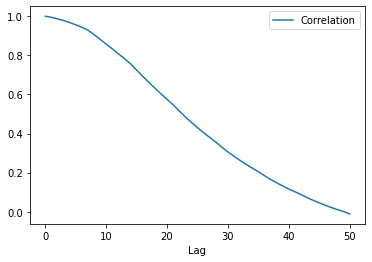

In [13]:
pd.options.display.float_format = '{:,.4f}'.format
l = pd.DataFrame(lag_correlation_ts(y_dataset, y_dataset, 50)) 
print(l)
l.plot()
plt.savefig('df.png')

To automate this process, let's make a universal function for time series transformation to create this DataSet.


In [14]:
def series_to_supervised(in_data, tar_data, n_in=1, dropnan=True, target_dep=False):

    n_vars = in_data.shape[1]
    cols, names = list(), list()

    if target_dep:
        i_start = 1
    else:
        i_start = 0
    for i in range(i_start, n_in + 1):
        cols.append(in_data.shift(i))
        names += [('%s(t-%d)' % (in_data.columns[j], i)) for j in range(n_vars)]

    if target_dep:
        for i in range(n_in, -1, -1):
            cols.append(tar_data.shift(i))
            names += [('%s(t-%d)' % (tar_data.name, i))]
    else:
        # put it all together
        cols.append(tar_data)
        names.append(tar_data.name)
    agg = pd.concat(cols, axis=1)
    agg.columns = names

    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)

    return agg

 When forecasting time series, the input and output fields are the same, only shifted by the lag.


In [15]:
dataset = series_to_supervised(pd.DataFrame(y_dataset), y_dataset, 14)
dataset

,new_cases(t-0),new_cases(t-1),new_cases(t-2),new_cases(t-3),new_cases(t-4),new_cases(t-5),new_cases(t-6),new_cases(t-7),new_cases(t-8),new_cases(t-9),new_cases(t-10),new_cases(t-11),new_cases(t-12),new_cases(t-13),new_cases(t-14),new_cases
date,,,,,,,,,,,,,,,,
2020-02-18,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2020-02-19,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2020-02-20,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2020-02-21,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2020-02-22,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-15,"2,202.0000","2,487.0000","2,858.0000","2,841.0000","2,827.0000","2,897.0000","2,288.0000","3,207.0000","3,451.0000","3,805.0000","3,545.0000","3,275.0000","3,205.0000","2,568.0000","3,157.0000","2,202.0000"
2022-05-16,"1,569.0000","2,202.0000","2,487.0000","2,858.0000","2,841.0000","2,827.0000","2,897.0000","2,288.0000","3,207.0000","3,451.0000","3,805.0000","3,545.0000","3,275.0000","3,205.0000","2,568.0000","1,569.0000"
2022-05-17,"1,829.0000","1,569.0000","2,202.0000","2,487.0000","2,858.0000","2,841.0000","2,827.0000","2,897.0000","2,288.0000","3,207.0000","3,451.0000","3,805.0000","3,545.0000","3,275.0000","3,205.0000","1,829.0000"


As you can see, the first and last columns contain the same target data.
Now we should create input (**X**) and output (**Y**) .


In [16]:
col = dataset.columns
X, Y = dataset[col[1:-1]], dataset[col[-1]]
print("Input: ", X.columns)
print("Target:", Y.name)

Input:  Index(['new_cases(t-1)', 'new_cases(t-2)', 'new_cases(t-3)', 'new_cases(t-4)',
       'new_cases(t-5)', 'new_cases(t-6)', 'new_cases(t-7)', 'new_cases(t-8)',
       'new_cases(t-9)', 'new_cases(t-10)', 'new_cases(t-11)',
       'new_cases(t-12)', 'new_cases(t-13)', 'new_cases(t-14)'],
      dtype='object')
Target: new_cases


### Data normalization


After that, we should normalize all the data. To do this, the **sklearn.preprocessing.MinMaxScaler** module should be used.
It allows us to normalize **fit_transform()** and convert back all the data easily: **inverse_transform()**.


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

scaled_x = scaler_x.fit_transform(X)
scaled_y = scaler_y.fit_transform(Y.values.reshape(-1, 1))

After that, we are going to form training and test DataSets using **sklearn.model_selection.train_test_split()**. 

We will make them at the ratio of 73/27. Without shuffling. It means, that test samples are located in the end of **X** and **Y** DataSets.

Input normalized DataSets: **X_train, X_test**

Target normalized DataSets: **y_train, y_test**


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_x, scaled_y, test_size=0.29, shuffle=False)

In [19]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(583, 14)
(583, 1)
(239, 14)
(239, 1)


All the data is normalized now. However, in order to compare to results, we need real scale data of the training and test DataSet:


In [20]:
res_train = scaler_y.inverse_transform(y_train).flatten()
res_test = scaler_y.inverse_transform(y_test).flatten()

Target real scale DataSets: **res_train, res_test**.


# Arima 

In [21]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 590 kB/s            


In [22]:

# fit an ARIMA model and plot residual errors
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

from matplotlib import pyplot
# load dataset
auto_arima_model=auto_arima(y_train,trace=True,Supress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-3064.970, Time=1.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3014.956, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-3024.640, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-3025.882, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-3016.924, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-3021.891, Time=0.72 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-3031.345, Time=0.66 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-3066.877, Time=1.62 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-3081.494, Time=1.47 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-3032.006, Time=0.33 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-3031.987, Time=1.65 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-3023.618, Time=0.26 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-3033.011, Time=0.48 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-3057.027, Time=2.09 sec
 ARIMA(3,1,1)(0,0,0

In [23]:
arima_model_202 = ARIMA(y_train, order=(3,1,3)).fit()

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [24]:
arima_model_202.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  583
Model:                 ARIMA(3, 1, 3)   Log Likelihood                1595.080
Date:                Fri, 20 May 2022   AIC                          -3176.161
Time:                        15:13:48   BIC                          -3145.595
Sample:                             0   HQIC                         -3164.246
                                - 583                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5351      0.015     35.156      0.000       0.505       0.565
ar.L2         -0.5380      0.017    -31.484      0.000      -0.571      -0.505
ar.L3          0.9585      0.014     68.215      0.000       0.931       0.986
ma.L1         -0.4419      0.027    -16.576      0.000      -0.494      -0.390
ma.L2          0.5156      0.031     16.603      0.000       0.455       0.576
ma.L3         -0.7883      0.028    -28.628      0.000      -0.842      -0.734
sigma2         0.0002    6.9e-06     35.162      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.72   Jarque-Bera (JB):              2259.41
Prob(Q):                              0.40   Prob(JB):                         0.00
Heteroskedasticity (H):               9.69   Skew:                            -0.56
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
start = dataset.index.get_loc('2020-05-1')
end = dataset.index.get_loc('2022-02-02')
print(start,'to',end)


73 to 715


In [26]:
pred_future_10101=arima_model_202.predict(start=len(dataset)+1,end=len(dataset)+(180),dynamic=False)
print("The length of pred_future values :",len(pred_future_10101))
pred_future_10101

The length of pred_future values : 180


array([0.06023728, 0.05995482, 0.05991036, 0.06019894, 0.06010653,
       0.0598592 , 0.06005319, 0.06020148, 0.05993938, 0.05990531,
       0.06017022, 0.06007908, 0.05985513, 0.06003826, 0.06016937,
       0.05992633, 0.05990129, 0.06014431, 0.06005487, 0.05985225,
       0.06002491, 0.06014056, 0.05991535, 0.05989811, 0.06012091,
       0.06003353, 0.05985038, 0.06001295, 0.06011472, 0.05990615,
       0.05989564, 0.06009976, 0.06001473, 0.05984933, 0.06000223,
       0.06009153, 0.0598985 , 0.05989374, 0.06008064, 0.05999818,
       0.05984895, 0.0599926 , 0.06007072, 0.05989218, 0.05989232,
       0.06006333, 0.05998363, 0.05984911, 0.05998393, 0.06005204,
       0.05988701, 0.05989129, 0.06004765, 0.05997083, 0.05984971,
       0.0599761 , 0.06003527, 0.05988282, 0.05989058, 0.06003345,
       0.0599596 , 0.05985066, 0.05996904, 0.06002021, 0.05987948,
       0.05989011, 0.06002057, 0.05994975, 0.05985187, 0.05996264,
       0.06000669, 0.05987685, 0.05988984, 0.06000888, 0.05994

In [27]:
history = [x for x in y_train]
predictions = list()
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
from math import sqrt
# walk-forward validation
for t in range(len(y_test)):
	model = ARIMA(history, order=(3,1,3))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = y_test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(y_test, predictions))
print('Test RMSE: %.3f' % rmse)

predicted=0.071785, expected=0.075768
predicted=0.075364, expected=0.071504
predicted=0.075401, expected=0.068389
predicted=0.066060, expected=0.062872
predicted=0.059402, expected=0.045378
predicted=0.046114, expected=0.045559
predicted=0.046066, expected=0.056808
predicted=0.051969, expected=0.064529
predicted=0.061634, expected=0.058799
predicted=0.063437, expected=0.055149
predicted=0.054728, expected=0.050216
predicted=0.045439, expected=0.044294
predicted=0.044279, expected=0.045470
predicted=0.047393, expected=0.054157
predicted=0.051604, expected=0.051322
predicted=0.048422, expected=0.047660
predicted=0.048913, expected=0.043859
predicted=0.043294, expected=0.043777
predicted=0.038588, expected=0.034557
predicted=0.032576, expected=0.038202
predicted=0.039370, expected=0.045842
predicted=0.042005, expected=0.040711
predicted=0.037181, expected=0.038584
predicted=0.040126, expected=0.034154
predicted=0.033767, expected=0.032826
predicted=0.028310, expected=0.031527
predicted=0.

In [28]:
y_test=y_test.flatten()
y_test

array([7.57675259e-02, 7.15037616e-02, 6.83892339e-02, 6.28724154e-02,
       4.53779443e-02, 4.55590215e-02, 5.68075367e-02, 6.45286681e-02,
       5.87993858e-02, 5.51488696e-02, 5.02163269e-02, 4.42938955e-02,
       4.54696901e-02, 5.41565666e-02, 5.13221049e-02, 4.76595169e-02,
       4.38593103e-02, 4.37772219e-02, 3.45567713e-02, 3.82024588e-02,
       4.58415019e-02, 4.07109815e-02, 3.85839281e-02, 3.41535728e-02,
       3.28256734e-02, 3.15267463e-02, 3.53052237e-02, 4.45546467e-02,
       3.81131274e-02, 3.94168832e-02, 3.84028509e-02, 3.45398708e-02,
       3.00056979e-02, 3.24755908e-02, 3.90064415e-02, 3.46412740e-02,
       3.45567713e-02, 3.09762716e-02, 3.02133331e-02, 2.51649010e-02,
       2.87381576e-02, 3.11090616e-02, 3.07324210e-02, 2.63865684e-02,
       2.61378891e-02, 2.77120535e-02, 2.44478353e-02, 2.76830811e-02,
       3.16064203e-02, 3.02181618e-02, 2.86101963e-02, 2.72122804e-02,
       2.46965146e-02, 2.14033241e-02, 2.46192550e-02, 2.87767874e-02,
      

<AxesSubplot:xlabel='date'>

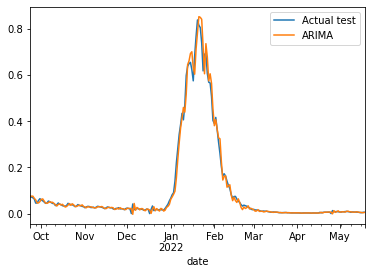

In [29]:
df_2 = pd.DataFrame({'Actual test': y_test, 'ARIMA': predictions,})
df_2.index = dataset.index[len(dataset)-len(res_test):]
df_2.plot()